In [9]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import seaborn as sns
from matplotlib import pyplot as plt

In [10]:
train = pd.read_csv(r"C:\Users\Mohammad\Desktop\Q1_data\BigMart_Dataset_Trainset.csv")
test = pd.read_csv(r"C:\Users\Mohammad\Desktop\Q1_data\BigMart_Dataset_Testset.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


از train.info مشخص است که Item_Weight و Outlet_Size دارای مقادیر NaN (مقادیر Null) هستند.
همچنین، می بینیم که مجموعه داده دارای 5 ویژگی عددی 
(Item_Weight، Item_Visibility، Item_MRP، Outlet_Establishment_Year و Item_Outlet_Sales)
و 7 ویژگی دسته بندی است
(Item_Identifier، Item_Fat_Content، Item_Type، Outlet_Identifier، Outlet_Size، Outlet_Location_Type و Outlet_Type).

In [9]:
train['source']='train'
test['source']='test'

train_test = pd.concat([train,test])
print("shape of the train:",train.shape)
print("shape of the test:",test.shape)
print("join train and test shape:",train_test.shape)

shape of the train: (8523, 13)
shape of the test: (5681, 12)
join train and test shape: (14204, 13)


In [10]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

In [11]:
train_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [12]:
train_test.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

در این مجموعه داده ها 3 ویژگی با مقادیر NaN از دست رفته داریم. سطرهای 8524 تا 14204 (مجموعه داده آزمایشی) دارای مقادیر NaN در ستون «Item_Outlet_Sales» هستند.

In [13]:
train_test[8524:14204]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NaN,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [14]:
print(train_test["Item_Outlet_Sales"].isnull().sum()/train_test.shape[0]*100,"%")

39.995775837792166 %


از 3 ویژگی با مقادیر NaN از دست رفته، مقادیر گمشده در «Item_Outlet_Sales» مقادیری هستند که باید توسط مدل ما پیش بینی شوند. بنابراین، باید مقادیر NaN را در ستون های Item_Weight و Outlet_Size قرار دهیم. مقادیر گمشده Item_Weight را می توان با میانگین آنها جایگزین کرد و مقادیر گمشده Outlet_Size را می توان با مُد آنها جایگزین کرد.

In [15]:
Mean = pd.pivot_table(train_test,values='Item_Weight', index='Item_Identifier',aggfunc='mean')
Mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


با استفاده از pivot_table  جدولی ایجاد کنیم که حاوی مقادیر میانگین Item_Identifier ها باشد.

با توجه به نتایج بالا متوجه شدیم که همه نمونه هایی که حاوی مقدار Item_Identifier یکسان هستند، Item_Weight یکسانی دارند.که در واقع این نشان می دهد که میانگین با مقدار آن داده ها برابر است. در زیر مشخص است برای NCZ30 مقدار Item_Weight برابر با 6.59 می باشد و میانگین هم همان 6.59 است.

In [16]:
A = train_test[train_test['Item_Identifier'].str.contains("NCZ30")]
A

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
1224,NCZ30,6.59,Low Fat,0.043828,Household,121.4098,OUT010,1998,NaN,Tier 3,Grocery Store,241.0196,train
2428,NCZ30,6.59,Low Fat,0.026163,Household,121.5098,OUT013,1987,High,Tier 3,Supermarket Type1,602.5490,train
3220,NCZ30,6.59,Low Fat,0.026180,Household,120.7098,OUT035,2004,Small,Tier 2,Supermarket Type1,2530.7058,train
3739,NCZ30,6.59,Low Fat,0.000000,Household,119.1098,OUT017,2007,NaN,Tier 2,Supermarket Type1,964.0784,train
4418,NCZ30,6.59,Low Fat,0.026226,Household,119.0098,OUT049,1999,Medium,Tier 1,Supermarket Type1,2530.7058,train
4523,NCZ30,NaN,LF,0.026058,Household,121.9098,OUT027,1985,Medium,Tier 3,Supermarket Type3,3374.2744,train
7068,NCZ30,6.59,Low Fat,0.026238,Household,121.6098,OUT045,2002,NaN,Tier 2,Supermarket Type1,2410.1960,train
365,NCZ30,6.59,Low Fat,0.026292,Household,121.7098,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
903,NCZ30,NaN,Low Fat,0.045847,Household,120.8098,OUT019,1985,Small,Tier 1,Grocery Store,NaN,test
3978,NCZ30,6.59,Low Fat,0.026185,Household,122.3098,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test


در این قسمت شروع به جایگزینی داده های از دست رفته میکنیم.

In [17]:
def function1(columns):
    
    itemidentifier = columns[0]
    itemweight = columns[1]
    
    if pd.isnull(itemweight):
        return Mean['Item_Weight'][Mean.index == itemidentifier]
    else:
        return itemweight
print ('Number of missing values in Item_Weight:',sum(train_test['Item_Weight'].isnull()))

train_test['Item_Weight'] = train_test[['Item_Identifier','Item_Weight']].apply(function1,axis=1).astype(float)

print ('Number of missing values in Item_Weight after execute function1: ',sum(train_test['Item_Weight'].isnull()))

Number of missing values in Item_Weight: 2439
Number of missing values in Item_Weight after execute function1:  0


با استفاده از pivot_table  جدولی ایجاد کنیم که حاوی مقادیر مُد Item_Identifier ها باشد.

In [18]:
Mode = pd.pivot_table(train_test, values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
Mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [19]:
def function2(columns):
    Outlet_Size = columns[1]
    Outlet_Type	 = columns[0]
    
    if pd.isnull(Outlet_Size):
        return Mode.loc['Outlet_Size'][Mode.columns == Outlet_Type][0]
    else:
        return Outlet_Size
    
print ('Number of missing values in Outlet_Size:',sum(train_test['Outlet_Size'].isnull()))

train_test['Outlet_Size'] = train_test[['Outlet_Type','Outlet_Size']].apply(function2,axis=1)

print ('Number of missing values in Outlet_Size after execute function2: ',sum(train_test['Outlet_Size'].isnull()))

Number of missing values in Outlet_Size: 4016
Number of missing values in Outlet_Size after execute function2:  0


In [20]:
train_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

تبدیل همه متغیرهای categorical  به مقادیر numerical  را می توان با نگاشت هر مقدار categorical با تعداد تکرار مربوطه به مقادیر موجود در ستون انجام داد.

In [21]:
categorical = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type','Item_Identifier','Outlet_Identifier']
for i in categorical:
    numerical  = train_test[i].value_counts().to_dict()
    train_test[i] = train_test[i].map(numerical)

In [22]:
train_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,9,9.30,8485,0.016047,1136,249.8092,1550,1999,4655,3980,9294,3735.1380,train
1,9,5.92,4824,0.019278,726,48.2692,1546,2009,4655,5583,1546,443.4228,train
2,10,17.50,8485,0.016760,736,141.6180,1550,1999,4655,3980,9294,2097.2700,train
3,9,19.20,4824,0.000000,2013,182.0950,925,1998,7996,5583,1805,732.3800,train
4,9,8.93,8485,0.000000,1548,53.8614,1553,1987,1553,5583,9294,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10,10.50,4824,0.013496,1989,141.3154,1550,1997,7996,3980,9294,NaN,test
5677,10,7.60,4824,0.142991,269,169.1448,1546,2009,4655,5583,1546,NaN,test
5678,9,10.00,8485,0.073529,858,118.7440,1548,2002,7996,4641,9294,NaN,test
5679,10,15.30,4824,0.000000,1084,214.6218,1543,2007,7996,4641,9294,NaN,test


In [23]:
train = train_test.loc[train_test['source']=="train"]
test = train_test.loc[train_test['source']=="test"]
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

c:\python\python37\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9,9.300,8485,0.016047,1136,249.8092,1550,1999,4655,3980,9294,3735.1380
1,9,5.920,4824,0.019278,726,48.2692,1546,2009,4655,5583,1546,443.4228
2,10,17.500,8485,0.016760,736,141.6180,1550,1999,4655,3980,9294,2097.2700
3,9,19.200,4824,0.000000,2013,182.0950,925,1998,7996,5583,1805,732.3800
4,9,8.930,8485,0.000000,1548,53.8614,1553,1987,1553,5583,9294,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,10,6.865,8485,0.056783,1989,214.5218,1553,1987,1553,5583,9294,2778.3834
8519,8,8.380,4824,0.046982,1086,108.1570,1548,2002,7996,4641,9294,549.2850
8520,8,10.600,8485,0.035186,858,85.1224,1550,2004,7996,4641,9294,1193.1136
8521,9,7.210,4824,0.145221,1989,103.1332,1546,2009,4655,5583,1546,1845.5976


In [25]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9,20.750,8485,0.007565,1989,107.8622,1550,1999,4655,3980,9294,NaN
1,9,8.300,195,0.038428,1136,87.3198,1543,2007,7996,4641,9294,NaN
2,9,14.600,8485,0.099575,280,241.7538,925,1998,7996,5583,1805,NaN
3,9,7.315,8485,0.015388,1989,155.0340,1543,2007,7996,4641,9294,NaN
4,9,13.600,4824,0.118599,1136,234.2300,1559,1985,4655,5583,1559,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10,10.500,4824,0.013496,1989,141.3154,1550,1997,7996,3980,9294,NaN
5677,10,7.600,4824,0.142991,269,169.1448,1546,2009,4655,5583,1546,NaN
5678,9,10.000,8485,0.073529,858,118.7440,1548,2002,7996,4641,9294,NaN
5679,10,15.300,4824,0.000000,1084,214.6218,1543,2007,7996,4641,9294,NaN


ابتدا باید همبستگی بین هر predictor  و متغیر هدف را پیدا کنیم. این کار را می توان با استفاده از متد ()corr انجام داد.

In [26]:
corr_matrix=train.corr()
corr_matrix['Item_Outlet_Sales']

Item_Identifier             -0.073375
Item_Weight                  0.013261
Item_Fat_Content             0.000017
Item_Visibility             -0.128625
Item_Type                    0.038123
Item_MRP                     0.567574
Outlet_Identifier            0.415482
Outlet_Establishment_Year   -0.049135
Outlet_Size                 -0.165968
Outlet_Location_Type         0.082256
Outlet_Type                  0.100742
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

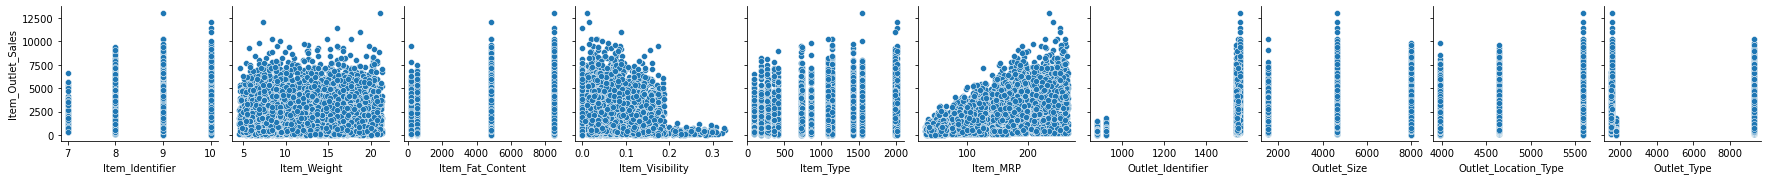

In [27]:
sns.pairplot(data=train,y_vars=['Item_Outlet_Sales'],x_vars=['Item_Identifier','Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_Type', 'Item_MRP','Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'])

<AxesSubplot:>

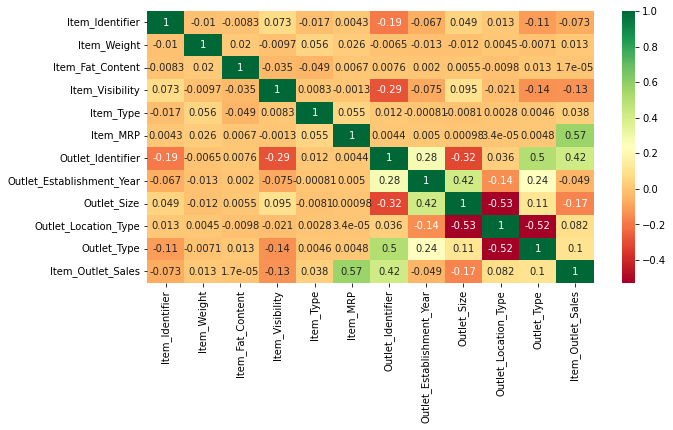

In [28]:
plt.figure(figsize = (10,5))
sns.heatmap(corr_matrix, cmap = "RdYlGn", annot = True)


از نمودار های بالا، می توان تصور کرد که Item_Identifier، Item_Weight، item_fat_content، Item_Type، Outlet_Location_Type همبستگی کمتری با Item_Outlet_Sales (متغیر هدف) دارند. ما می توانیم این پیش بینی ها را از مدل حذف کنیم.

In [29]:
train= train.drop(['Item_Identifier','Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type'],axis=1)

رسم نمودار ها قبل از Scaling

<AxesSubplot:xlabel='Outlet_Type', ylabel='Count'>

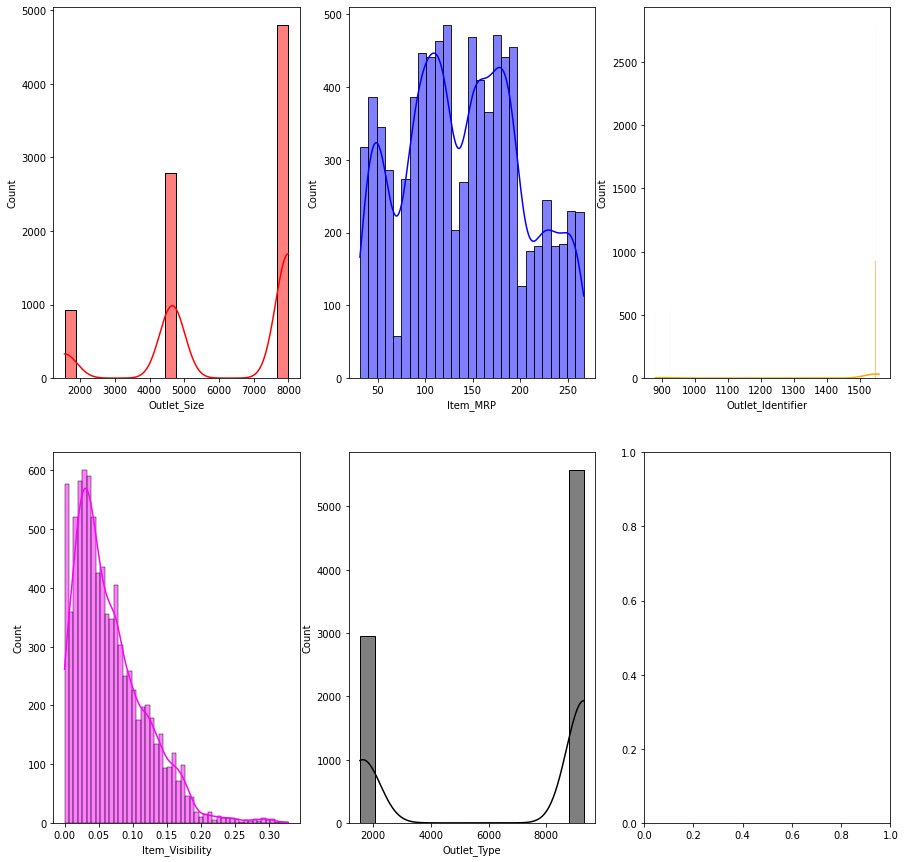

In [38]:
fig, ax = plt.subplots(2,3,figsize = (15,15))
sns.histplot(train["Outlet_Size"], kde =True, ax=ax[0,0], color = "red")
sns.histplot(train["Item_MRP"], kde =True, ax=ax[0,1], color = "blue")
sns.histplot(train["Outlet_Identifier"], kde =True, ax=ax[0,2], color = "orange")
sns.histplot(train["Item_Visibility"], kde =True, ax=ax[1,0], color = "magenta")
sns.histplot(train["Outlet_Type"], kde =True, ax=ax[1,1], color = "black")


رسم نمودار ها بعد از scalling که برای scalling داده ها از log saclling استفاده شده است.

In [39]:
for j in train.columns:
    train[j] =np.log(train[j])

c:\python\python37\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [40]:
train.head()

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,-4.132215,5.520697,7.346010,7.600402,8.445697,9.137124,8.225540
1,-3.948780,3.876794,7.343426,7.605392,8.445697,7.343426,6.094524
2,-4.088756,4.953133,7.346010,7.600402,8.445697,9.137124,7.648392
3,-inf,5.204529,6.829794,7.599902,8.986697,7.498316,6.596300
4,-inf,3.986414,7.347944,7.594381,7.347944,9.137124,6.902446


<AxesSubplot:xlabel='Outlet_Type', ylabel='Count'>

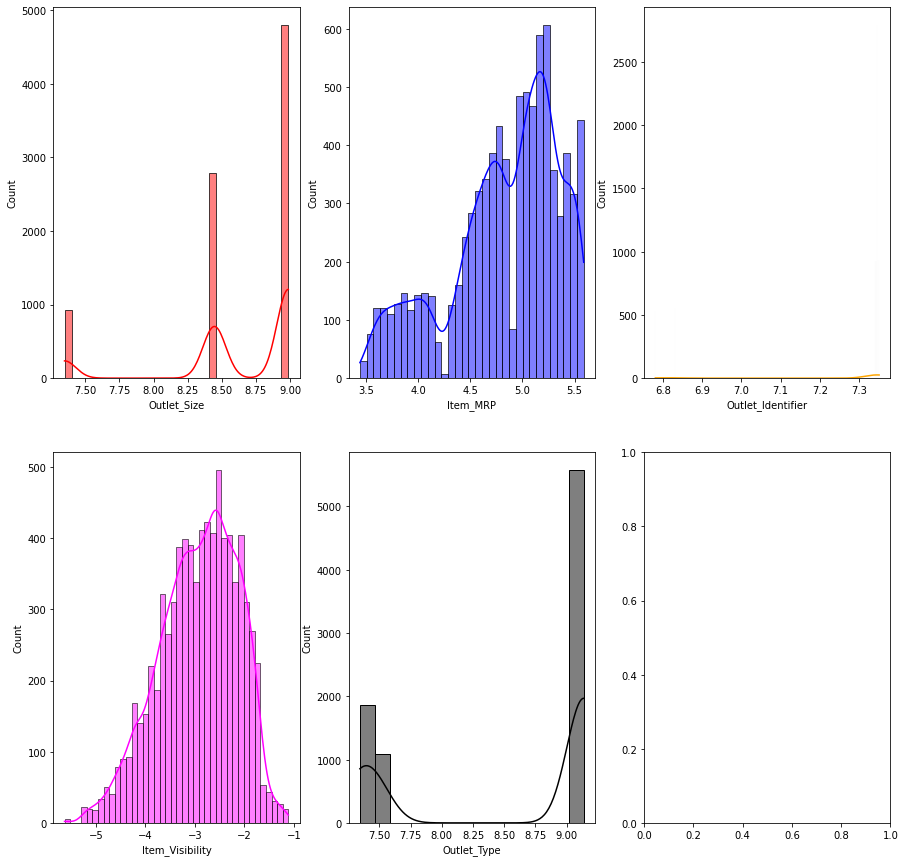

In [42]:
fig, ax = plt.subplots(2,3,figsize = (15,15))
sns.histplot(train["Outlet_Size"], kde =True, ax=ax[0,0], color = "red")
sns.histplot(train["Item_MRP"], kde =True, ax=ax[0,1], color = "blue")
sns.histplot(train["Outlet_Identifier"], kde =True, ax=ax[0,2], color = "orange")
sns.histplot(train["Item_Visibility"], kde =True, ax=ax[1,0], color = "magenta")
sns.histplot(train["Outlet_Type"], kde =True, ax=ax[1,1], color = "black")


In [27]:
M = ["n/a", "na", "--"," ","NA"]
train1 = pd.read_csv(r"C:\Users\Mohammad\Desktop\Q1_data\BigMart_Dataset_Trainset.csv", na_values = M)

train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [28]:
train1['Item_Fat_Content'] = train1['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})

In [29]:
cat = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type','Item_Identifier','Outlet_Identifier']
for i in cat:
    num  = train1[i].value_counts().to_dict()
    train1[i] = train1[i].map(num)

In [30]:
train1['Item_Weight'].fillna((df['Item_Weight'].mean()), inplace=True)
train1['Outlet_Size'].fillna((df['Outlet_Size'].mean()), inplace=True)

In [31]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,8,9.300,5517,0.016047,682,249.8092,930,1999,2793.000000,2388,5577,3735.1380
1,6,5.920,3006,0.019278,445,48.2692,928,2009,2793.000000,3350,928,443.4228
2,7,17.500,5517,0.016760,425,141.6180,930,1999,2793.000000,2388,5577,2097.2700
3,6,19.200,3006,0.000000,1232,182.0950,555,1998,2351.057909,3350,1083,732.3800
4,6,8.930,5517,0.000000,910,53.8614,932,1987,932.000000,3350,5577,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,8,6.865,5517,0.056783,1200,214.5218,932,1987,932.000000,3350,5577,2778.3834
8519,6,8.380,3006,0.046982,648,108.1570,929,2002,2351.057909,2785,5577,549.2850
8520,6,10.600,5517,0.035186,520,85.1224,930,2004,2388.000000,2785,5577,1193.1136
8521,6,7.210,3006,0.145221,1200,103.1332,928,2009,2793.000000,3350,928,1845.5976


In [118]:
from sklearn.model_selection import train_test_split
Y = df['Item_Outlet_Sales'].to_numpy("float")
X = df.drop(["Item_Outlet_Sales"],axis=1).to_numpy("float")

XTrain1, XTest1, YTrain1, YTest1 = train_test_split(X, Y, test_size=0.1, random_state=1)
XTrain1, XValidation1, YTrain1, YValidation1 = train_test_split(XTrain1, YTrain1, test_size=(0.1/0.9), random_state=1) 

In [119]:
XTrain2, XTest2, YTrain2, YTest2 = train_test_split(X, Y, test_size=0.2, random_state=1)
XTrain2, XValidation2, YTrain2, YValidation2 = train_test_split(XTrain2, YTrain2, test_size=(0.2/0.8), random_state=1) 

In [71]:
Y

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

In [136]:
class RidgeRegression1:
    
    def __init__(self,learningrate,iterations,penality):
        self.learningrate = learningrate
        self.iterations = iterations
        self.penality = penality

    def fit(self,X,Y):
        self.m , self.n = X.shape
        self.W = np.zeros(self.n)

        self.b = 0
        self.X = X
        self.Y = Y

        for i in range(self.iterations):
            self.update_weights()
        return self

    

    def update_weights( self ):
        ypred = self.predict( self.X )

        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - ypred ) ) + (2 * self.penality * self.W ) ) / self.m
        db= - 2 * np.sum( self.Y - ypred ) / self.m

        self.W = self.W - self.learningrate * dW
        self.b = self.b - self.learningrate * db
        return self
        

    def predict( self , X ):
        return X.dot( self.W ) + self.b


In [296]:
class LinearRegression1:
    def __init__(self,penality=0.01, iteration=100000, mseORmae='mse'):
        self.penality = penality
        self.iteration = iteration
        self.minimum = 0.00001
        self.mseORmae = mseORmae
        
    def predict(self, x: np.array, Tt: np.array):
        return (Tt * x).sum(1)
        
    def functionJ(self, x: np.array, y: np.array, Tt):
        if self.mseORmae == 'mae':
            return np.abs((self.predict(x, Tt) - y)).mean()
        if self.mseORmae == 'mse':
            return ((self.predict(x, Tt) - y) ** 2).mean()
        
    def functionDerivativeJ(self, x: np.array, y: np.array, Tt: np.array):
        ht = self.predict(x, Tt)
        if self.mseORmae == 'mse':
            return ((ht - y) * x.transpose()).mean(1)

        if self.mseORmae == 'mae':
            return (np.sign(ht - y) * x.transpose()).mean(1)
    
    def function1(self, x: np.array, start = 0):
        if start:
            self.x0 = x.std()
        x = np.append(np.full((len(x), 1), self.x0), x, 1)
        return x

    def fit(self, x: np.array,y: np.array,xtest: np.array,ytest: np.array):
        x = self.function1(x, True)
        xtest = self.function1(xtest, True)
        Tt = np.random.normal(0, y.std() / x.std(), x.shape[1])
        
        self.ArrTest = []
        self.ArrMse = []
        self.ArrTt = []
        end = False
        length = len(y)
        for k in range(self.iteration):
            if end: break
            for i in range(0, len(y), length):
                xb, yb = x[i:i+length], y[i:i+length]
                functionDerivativeJ = self.functionDerivativeJ(xb, yb, Tt)
                
                if abs(functionDerivativeJ).max() < self.minimum:
                    end = True
                
                Tt = Tt - self.penality * functionDerivativeJ

                self.ArrTt.append(Tt)
                self.ArrMse.append(self.functionJ(x, y, Tt))
                self.ArrTest.append(self.functionJ(xtest, ytest, Tt))

        self.Tt = Tt
        return Tt
    
    


c:\python\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in square
  from ipykernel import kernelapp as app
c:\python\python37\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply
c:\python\python37\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in subtract


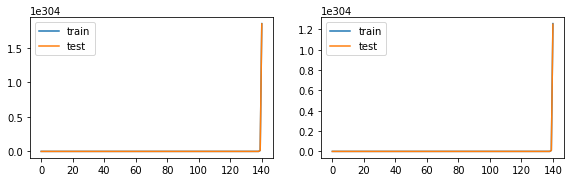

In [297]:
LR_1 = LinearRegression1(penality = 0.0000002, iteration = 30000)
LR_1.fit(XTrain1, YTrain1, XTest1, YTest1)

LR_2 = LinearRegression1(penality = 0.0000002, iteration = 30000)
LR_2.fit(XTrain2, YTrain2, XTest2, YTest2)


fig = plt.figure(1, figsize=(20,15))
plt.subplot(5, 4, 1)
plt.plot(LR_1.ArrMse, label='train')
plt.plot(LR_1.ArrTest, label='test')
plt.legend()
plt.subplot(5, 4, 2)
plt.plot(LR_2.ArrMse, label='train')
plt.plot(LR_2.ArrTest, label='test')
plt.legend()
plt.show()

In [298]:
class RidgeRegression:
    def __init__(self,penality=0.01, iteration=1000, mseORmae='mse',Lambda = 0.1):
        self.penality = penality
        self.iteration = iteration
        self.min_grad = 0.000001
        self.mseORmae = mseORmae
        self.Lambda = Lambda
        
    def predict(self, x: np.array, Tt: np.array):
        return (Tt * x).sum(1)
        
    def functionJ(self, x: np.array, y: np.array, Tt):
        return ((self.predict(x, Tt) - y) ** 2).mean() + self.Lambda * (Tt.T @ Tt)
        
    def functionDerivativeJ(self, x: np.array, y: np.array, Tt: np.array):
        ht = self.predict(x, Tt)
        return ((ht - y) * x.transpose()).mean(1) + self.Lambda * Tt   
    
    def function1(self, x: np.array, start = 0):
        if start:
            self.x0 = x.std()
        x = np.append(np.full((len(x), 1), self.x0), x, 1)
        return x

    def fit(self, x: np.array,y: np.array,x_test: np.array,y_test: np.array):
        x = self.function1(x, True)
        x_test = self.function1(x_test, True)
        Tt = np.random.normal(0, 0, x.shape[1])
        
        self.ArrTt = []
        self.ArrMse = []
        self.ArrTest = []
        stop = False
        length = len(y)
        for k in range(self.iteration):
            if stop: break
            for i in range(0, len(y), length):
                xb, yb = x[i:i+length], y[i:i+length]
                functionDerivativeJ = self.functionDerivativeJ(xb, yb, Tt)
                
                if abs(functionDerivativeJ).max() < self.min_grad:
                    stop = True
                
                Tt = Tt - self.penality * functionDerivativeJ

                self.ArrTt.append(Tt)
                self.ArrMse.append(self.functionJ(x, y, Tt))
                self.ArrTest.append(self.functionJ(x_test, y_test, Tt))

        self.Tt = Tt
        return Tt
    
  

c:\python\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in square
  del sys.path[0]
c:\python\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in matmul
  del sys.path[0]
c:\python\python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply
c:\python\python37\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in subtract


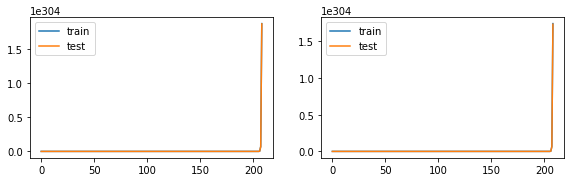

In [299]:
Ridge_1 = RidgeRegression(penality = 0.0000001, iteration = 1000, Lambda= 0.2)
Ridge_1.fit(XTrain1, YTrain1, XTest1, YTest1)

Ridge_2 = RidgeRegression(penality = 0.0000001, iteration = 1000, Lambda= 0.2)
Ridge_2.fit(XTrain2, YTrain2, XTest2, YTest2)


fig = plt.figure(1, figsize=(20,15))
plt.subplot(5, 4, 1)
plt.plot(Ridge_1.ArrMse, label='train')
plt.plot(Ridge_1.ArrTest, label='test')
plt.legend()
plt.subplot(5, 4, 2)
plt.plot(Ridge_2.ArrMse, label='train')
plt.plot(Ridge_2.ArrTest, label='test')
plt.legend()
plt.show()

در تلاش برای به حداقل رساندن تابع هزینه، رگرسیون Lasso به طور خودکار آن دسته از ویژگی هایی را انتخاب می کند که مفید هستند و ویژگی های بی فایده یا زائد را کنار می گذارند. در رگرسیون Lasso کنار گذاشتن یک ویژگی ضریب آن را برابر با 0 می کند.
بنابراین، ایده استفاده از رگرسیون Lasso برای اهداف انتخاب ویژگی بسیار ساده است: ما یک رگرسیون Lasso را بر روی یک نسخه مقیاس بندی شده از مجموعه داده خود قرار می دهیم و فقط آن ویژگی هایی را در نظر می گیریم که ضریب متفاوتی با 0 دارند.که این باعث می شود که ما به راحتی ویژگی های مفید را تشخیص دهیم و ویژگی های بی فایده را کنار بگذاریم.

In [300]:
class LassoRegression:
    def __init__(self,penality=0.1, iteration=1000, mseORmae='mse',Lambda = 0.5):
        self.penality = penality
        self.iteration = iteration
        self.minimum = 0.000001
        self.mseORmae = mseORmae
        self.Lambda = Lambda
    
    def predict(self, x: np.array, Tt: np.array):
        return (Tt * x).sum(1)
          
    def functionJ(self, x: np.array, y: np.array, Tt):
        return ((self.predict(x, Tt) - y) ** 2).mean() + self.Lambda * np.abs(np.sum(Tt))
        
    def functionDerivativeJ(self, x: np.array, y: np.array, Tt: np.array):
        ht = self.predict(x, Tt)
        return ((ht - y) * x.transpose()).mean(1) + self.Lambda * np.sign(Tt)
    def function1(self, x: np.array, start = 0):
        if start:
            self.x0 = x.std()
        x = np.append(np.full((len(x), 1), self.x0), x, 1)
        return x

    def fit(self, x: np.array,y: np.array,x_test: np.array,y_test: np.array):
        x = self.function1(x, True)
        x_test = self.function1(x_test, True)
        Tt = np.random.normal(0, 0, x.shape[1])
        
        self.ArrTt = []
        self.ArrMse = []
        self.ArrTest = []
        end = False
        length = len(y)
        for k in range(self.iteration):
            if end: break
            for i in range(0, len(y), length):
                xb, yb = x[i:i+length], y[i:i+length]
                functionDerivativeJ = self.functionDerivativeJ(xb, yb, Tt)
                
                if abs(functionDerivativeJ).max() < self.minimum:
                    end = True
                
                Tt = Tt - self.penality * functionDerivativeJ

                self.ArrTt.append(Tt)
                self.ArrMse.append(self.functionJ(x, y, Tt))
                self.ArrTest.append(self.functionJ(x_test, y_test, Tt))

        self.Tt = Tt
        return Tt
    


c:\python\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in square
  del sys.path[0]
c:\python\python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply
c:\python\python37\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in subtract
c:\python\python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sign


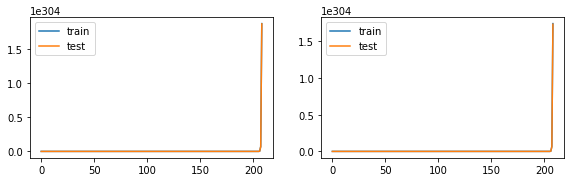

In [301]:
Lasso_1 = LassoRegression(penality = 0.0000001, iteration = 3000, Lambda= 1)
Lasso_1.fit(XTrain1, YTrain1, XTest1, YTest1)

Lasso_2 = LassoRegression(penality = 0.0000001, iteration = 3000, Lambda= 0.4)
Lasso_2.fit(XTrain2, YTrain2, XTest2, YTest2)


fig = plt.figure(1, figsize=(20,15))
plt.subplot(5, 4, 1)
plt.plot(Lasso_1.ArrMse, label='train')
plt.plot(Lasso_1.ArrTest, label='test')
plt.legend()
plt.subplot(5, 4, 2)
plt.plot(Lasso_2.ArrMse, label='train')
plt.plot(Lasso_2.ArrTest, label='test')
plt.legend()
plt.show()

In [304]:
class LassoRegressionfeatureSelection:
    def __init__(self,penality=0.1, iteration=10000, mseORmae='mse',Lambda = 0.1):
        self.penality = penality
        self.iteration = iteration
        self.minimum = 0.000001
        self.mseORmae = mseORmae
        self.Lambda = Lambda
        
    def predict(self, x: np.array, Tt: np.array):
        return (Tt * x).sum(1)
        
    def functionJ(self, x: np.array, y: np.array, Tt):
        return ((self.predict(x, Tt) - y) ** 2).mean() + self.Lambda * np.abs(np.sum(Tt))
        
    def functionDerivativeJ(self, x: np.array, y: np.array, Tt: np.array):
        ht = self.predict(x, Tt)
        return ((ht - y) * x.transpose()).mean(1) + self.Lambda * np.sign(Tt)
    
    def function1(self, x: np.array, start = 0):
        if start:
            self.x0 = x.std()
        x = np.append(np.full((len(x), 1), self.x0), x, 1)
        return x

    def fit(self, x: np.array,y: np.array,x_test: np.array,y_test: np.array):
        x = self.function1(x, True)
        x_test = self.function1(x_test, True)
        Tt = np.random.normal(0, 0, x.shape[1])
        
        self.ArrTt = []
        self.ArrMse = []
        self.ArrTest = []
        end = False
        length = len(y)
        for k in range(self.iteration):
            if end: break
            for i in range(0, len(y), length):
                xb, yb = x[i:i+length], y[i:i+length]
                functionDerivativeJ = self.functionDerivativeJ(xb, yb, Tt)
                
                if abs(functionDerivativeJ).max() < self.minimum:
                    end = True
                
                Tt = Tt - self.penality * functionDerivativeJ
                if k >= 400 :
                    Tt[np.abs(Tt) < 0.0001] = 0

                self.ArrTt.append(Tt)
                self.ArrMse.append(self.functionJ(x, y, Tt))
                self.ArrTest.append(self.functionJ(x_test, y_test, Tt))

        self.Tt = Tt
        return Tt
    


c:\python\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in square
  del sys.path[0]
c:\python\python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply
c:\python\python37\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in subtract
c:\python\python37\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in less
c:\python\python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sign


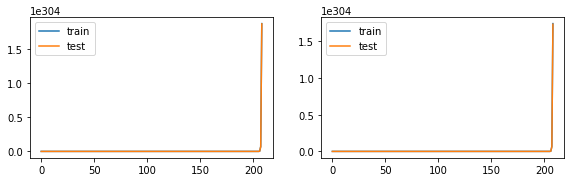

In [305]:
Lasso_fs_1 = LassoRegressionfeatureSelection(penality = 0.0000001, iteration = 2000, Lambda= 5)
Lasso_fs_1.fit(XTrain1, YTrain1, XTest1, YTest1)

Lasso_fs_2 = LassoRegressionfeatureSelection(penality = 0.0000001, iteration = 2000, Lambda= 5)
Lasso_fs_2.fit(XTrain2, YTrain2, XTest2, YTest2)

fig = plt.figure(1, figsize=(20,15))
plt.subplot(5, 4, 1)
plt.plot(Lasso_fs_1.ArrMse, label='train')
plt.plot(Lasso_fs_1.ArrTest, label='test')
plt.legend()
plt.subplot(5, 4, 2)
plt.plot(Lasso_fs_2.ArrMse, label='train')
plt.plot(Lasso_fs_2.ArrTest, label='test')
plt.legend()
plt.show()

In [279]:
print("Ridge1")
RG1 = RidgeRegression(penality = 0.00000001, iteration = 2000, Lambda = 0.1)
Tt1 = RG1.fit(XTrain1, YTrain1, XTest1, YTest1)
print(RG1.ArrMse[-1] , RG1.ArrTest[-1] , Tt1)

print("Ridge2")
RG2 = RidgeRegression(penality = 0.000000001, iteration = 2000, Lambda = 10000)
Tt2 = RG2.fit(XTrain1, YTrain1, XTest1, YTest1)
print(RG2.ArrMse[-1] , RG2.ArrTest[-1] , Tt2)

print("Ridge3")
RG3 = RidgeRegression(penality = 0.0000000001, iteration = 2000, Lambda = 10)
Tt3 = RG3.fit(XTrain1, YTrain1, XTest1, YTest1)
print(RG3.ArrMse[-1] , RG3.ArrTest[-1] , Tt3)



Ridge1
2500388.1312658563 2397159.3799675116 [-3.83799422e-01 -1.37108568e-03 -1.02169826e-03 -6.10517916e-02
 -1.87548048e-04  7.24410045e-02  1.14943589e+00  1.05500116e+00
 -4.62658484e-01  3.58850927e-01  5.54009154e-01  1.26122705e-01]
Ridge2
2775992.844937312 2684978.7963139564 [ 7.16697264e-02  2.17210972e-04  6.71581759e-04 -2.21896186e-02
 -1.59898308e-05  6.85350771e-02  1.26370494e-01  1.75324724e-01
  7.74058429e-02  2.19265269e-01  2.85716387e-01  1.14579866e-01]
Ridge3
2885917.0367421643 2790527.5220437795 [7.13442356e-02 2.33748825e-04 5.28541063e-04 1.38167976e-01
 8.05044144e-07 3.63536425e-02 1.78722948e-02 4.93855754e-02
 7.95800095e-02 1.10795922e-01 1.36183681e-01 1.31037622e-01]


In [276]:
print("Lasso1")
LS1 = LassoRegression(penality = 0.00000001, iteration = 2000, Lambda = 0.1)
Tt1 = LS1.fit(XTrain1, YTrain1, XTest1, YTest1)
print(LS1.ArrMse[-1] , LS1.ArrTest[-1] , Tt1)

print("Lasso2")
LS2 = LassoRegression(penality = 0.00000001, iteration = 2000, Lambda = 10000000)
Tt2 = LS2.fit(XTrain1, YTrain1, XTest1, YTest1)
print(LS2.ArrMse[-1] , LS2.ArrTest[-1] , Tt2)

print("Lasso3")
LS3 = LassoRegression(penality = 0.00000001, iteration = 2000, Lambda = 0.000001)
Tt3 = LS3.fit(XTrain1, YTrain1, XTest1, YTest1)
print(LS3.ArrMse[-1] , LS3.ArrTest[-1] , Tt3)

Lasso1
2500388.287139816 2397159.549661674 [-3.83798361e-01 -1.36997475e-03 -1.02140069e-03 -6.10517562e-02
 -1.85607247e-04  7.24403246e-02  1.14943515e+00  1.05500071e+00
 -4.62657398e-01  3.58850460e-01  5.54008579e-01  1.26122597e-01]
Lasso 2
8896177.587923648 8487193.578752402 [ 0.02482636  0.06153116  0.05462791  0.09430325 -0.09839569  0.07811133
 -0.00070106  0.10240237  0.03878571 -0.04847982  0.04159831 -0.07184636]
Lasso 3
2500387.5429598396 2397158.7819292783 [-3.83799911e-01 -1.37108736e-03 -1.02170003e-03 -6.10518056e-02
 -1.87548213e-04  7.24410122e-02  1.14943702e+00  1.05500211e+00
 -4.62659067e-01  3.58851067e-01  5.54009408e-01  1.26122716e-01]


از طریق مشاهدات بالا میتوان به این نتیجه رسید که هر چه مقدار لاندا را زیاد کنیم مقدار پارامتر ها کوچک شده یا اگر لاندا را کوچک کنیم اورفیت رخ میدهد همچنین اگر ضریب منظم ساز را بزرگ کنیم مقدار پارامتر ها کوچک شده و آندرفیت رخ می دهد.

In [250]:
df['Outlet_Establishment_Year2'] = df["Outlet_Establishment_Year"].pow(2)
df['Item_MRP2'] = df["Item_MRP"].pow(2)

In [251]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Establishment_Year2,Item_MRP2
0,8,9.300,5517,0.016047,682,249.8092,930,1999,2793.000000,2388,5577,3735.1380,3996001,62404.636405
1,6,5.920,3006,0.019278,445,48.2692,928,2009,2793.000000,3350,928,443.4228,4036081,2329.915669
2,7,17.500,5517,0.016760,425,141.6180,930,1999,2793.000000,2388,5577,2097.2700,3996001,20055.657924
3,6,19.200,3006,0.000000,1232,182.0950,555,1998,2351.057909,3350,1083,732.3800,3992004,33158.589025
4,6,8.930,5517,0.000000,910,53.8614,932,1987,932.000000,3350,5577,994.7052,3948169,2901.050410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,8,6.865,5517,0.056783,1200,214.5218,932,1987,932.000000,3350,5577,2778.3834,3948169,46019.602675
8519,6,8.380,3006,0.046982,648,108.1570,929,2002,2351.057909,2785,5577,549.2850,4008004,11697.936649
8520,6,10.600,5517,0.035186,520,85.1224,930,2004,2388.000000,2785,5577,1193.1136,4016016,7245.822982
8521,6,7.210,3006,0.145221,1200,103.1332,928,2009,2793.000000,3350,928,1845.5976,4036081,10636.456942


In [253]:
X2 = df.drop(["Item_Outlet_Sales"],axis=1).to_numpy("float")
Y2 = df['Item_Outlet_Sales'].to_numpy("float")

XTrainm, XTestm, YTrainm, YTestm = train_test_split(X2, Y2, test_size=0.1, random_state=1)
XTrainm, Xvalidationm, YTrainm, Yvalidationm = train_test_split(XTrainm, YTrainm, test_size=(0.1/0.9), random_state=1)  

No handles with labels found to put in legend.


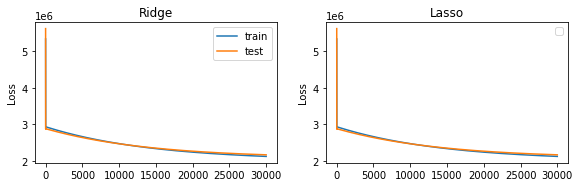

In [265]:
R1 = RidgeRegression(penality = 0.0000000000001, iteration = 30000, Lambda= 10000)
R1.fit(XTrainm, YTrainm, XTestm, YTestm)
L2 = LassoRegression(penality = 0.0000000000001, iteration = 30000, Lambda= 10000)
L2.fit(XTrainm, YTrainm, XTestm, YTestm)

fig = plt.figure(1, figsize=(20,15))
plt.subplot(5, 4, 1)
plt.plot(R1.ArrMse, label='train')
plt.plot(R1.ArrTest, label='test')
plt.gca().set(title="Ridge", ylabel='Loss')
plt.legend()
plt.subplot(5, 4, 2)
plt.plot(L2.ArrMse)
plt.plot(L2.ArrTest)
plt.gca().set(title="Lasso", ylabel='Loss')
plt.legend()
plt.show()

In [263]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

test_new = np.append(np.full((len(XTestm), 1), XTestm.std()), XTestm, 1)
H1 = R1.predict(test_new, R1.Tt)
H2 = L2.predict(test_new, L2.Tt)
print("MSE Ridge : ", mean_squared_error(YTestm, H1))
print("MAE Ridge : ", mean_absolute_error(YTestm, H1))
print("MSE Lasso: ", mean_squared_error(YTestm, H2))
print("MAE Lasso: ", mean_absolute_error(YTestm, H2))

MSE Ridge :  2720675.41894486
MAE Ridge :  1350.4244721222065
MSE Lasso:  2720764.82205397
MAE Lasso:  1350.448076703161


ابتدا مقادیر Outlet_Establishment_Year و Item_MRP را به توان دو میرسانیم و چون داده ها دارای مقادیر زیادی هستند مدل بخوبی روی آن ها نمیتواند آموزش ببیند که با استفاده از دو مدل Ridge و Lasso نشان داده شده است.از روی مقادیر mse , mae به دست آمده میتوان گفت که این overfit رخ نداده است. 